[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/charlesincharge/CS155/blob/revise-set-1/2022/sets/set1/src/2_notebook.ipynb)

# Problem 2

In [1]:
# Setup:

import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

## Example code using the polyfit and kfold functions

#### Note: This section is not part of the homework problem, but provides some potentially-helpful example code regarding the usage of numpy.polyfit, numpy.polyval, and sklearn.model_selection.KFold.

First, let's generate some synthetic data: a quadratic function plus some Gaussian noise.

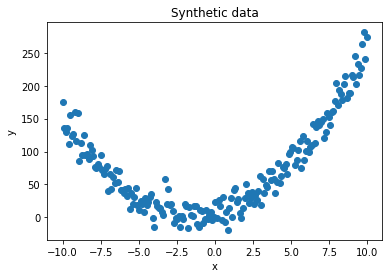

In [2]:
# Coefficients of the quadratic function, y(x) = ax^2 + bx + c:
a = 2
b = 5
c = 7

N = 200       # Number of data points
x = np.linspace(-10, 10, num = N)                # x ranges from -10 to 10
# y is the quadratic function of x specified by a, b, and c, plus noise
y = a*x**2 + b*x + c + 15* np.random.randn(N)

# Plot the data:
plt.figure()
plt.plot(x, y, marker = 'o', linewidth = 0)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic data')

plt.show()

Next, we'll use the numpy.polyfit function to fit a quadratic polynomial to this data. We can evaluate the resulting polynomial at arbitrary points.

We fit the following quadratic function: f(x) = 1.959866*x^2 + 5.347506*x + 7.002781

f(4) = 59.750667


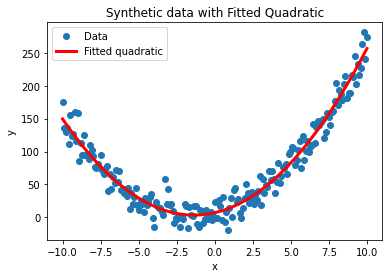

In [3]:
# Fit a degree-2 polynomial to the data:
degree = 2
coefficients = np.polyfit(x, y, degree)

# Print out the resulting quadratic function:
print('We fit the following quadratic function: f(x) = %f*x^2 + %f*x + %f' %  \
      (coefficients[0], coefficients[1], coefficients[2]))

# Evaluate the fitted polynomial at x = 4:
x_test = 4
f_eval = np.polyval(coefficients, x_test)
print('\nf(%i) = %f' % (x_test, f_eval))

# Let's visualize our fitted quadratic:
plt.figure()

plt.plot(x, y, marker = 'o', linewidth = 0)
plt.plot(x, np.polyval(coefficients, x), color = 'red', linewidth = 3)

plt.legend(['Data', 'Fitted quadratic'], loc = 'best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic data with Fitted Quadratic')

plt.show()

Finally, assume that we'd like to perform 10-fold cross validation with this dataset. Let's divide it into training and test sets, and print out the test sets. To limit the amount of text that we are printing out, we'll modify the dataset to make it smaller.

In [4]:
# Coefficients of the quadratic function, y = ax^2 + bx + c:
a = 2
b = 5
c = 7

N = 80       # Number of points--fewer this time!
x = np.linspace(-10, 10, num = N)                # x ranges from -10 to 10
# y is the quadratic function of x specified by a, b, and c, plus noise
y = a*x**2 + b*x + c + 15* np.random.randn(N)

# Initialize kfold cross-validation object with 10 folds:
num_folds = 10
kf = KFold(n_splits=num_folds)

# Iterate through cross-validation folds:
i = 1
for train_index, test_index in kf.split(x):
    
    # Print out test indices:
    # print('Fold ', i, ' of ', num_folds, ' test indices:', test_index)
    
    # Training and testing data points for this fold:
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    i += 1

## Loading the Data for Problem 2

This code loads the data from bv_data.csv using the load_data helper function. Note that data[:, 0] is an array of all the x values in the data and data[:, 1] is an array of the corresponding y values.

In [5]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    Input:
        filename: given as a string.
    Output:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Write your code below for solving problem 2 part B:

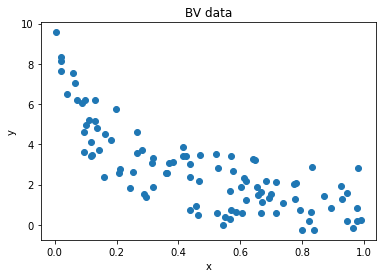

In [6]:
data = load_data('data/bv_data.csv')
x = data[:, 0]
y = data[:, 1]

# Plot the data:
plt.figure()
plt.plot(x, y, marker = 'o', linewidth = 0)

plt.xlabel('x')
plt.ylabel('y')
plt.title('BV data')

plt.show()

[-5.69058788  5.44524469]
We fit the following 1-degree function: f(x) = -5.690587882357668*x + 5.44524468985147

f(4) = -17.317107


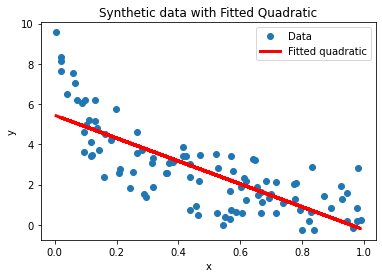

In [7]:
# Fit a degree-n polynomial to the data:
degree = 1
coefficients = np.polyfit(x, y, degree)
print(coefficients)

# Print out the resulting quadratic function:
print(f'We fit the following {degree}-degree function: f(x) = {coefficients[0]}*x + {coefficients[1]}')

# Evaluate the fitted polynomial at x = 4:
x_test = 4
f_eval = np.polyval(coefficients, x_test)
print('\nf(%i) = %f' % (x_test, f_eval))

# Let's visualize our fitted quadratic:
plt.figure()

plt.plot(x, y, marker = 'o', linewidth = 0)
plt.plot(x, np.polyval(coefficients, x), color = 'red', linewidth = 3)

plt.legend(['Data', 'Fitted quadratic'], loc = 'best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic data with Fitted Quadratic')

plt.show()

1-degree: training: 1.7519987714374892, test: 1.8891370858117338


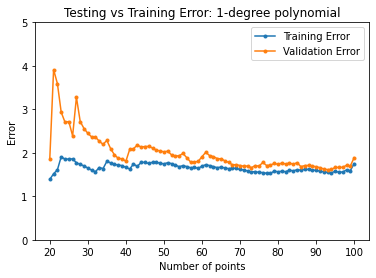

2-degree: training: 1.2500245678374666, test: 1.4074078509312977


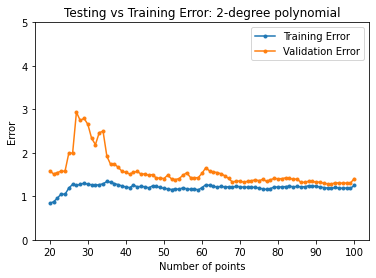

6-degree: training: 0.9497442256631867, test: 1.1347141917227996


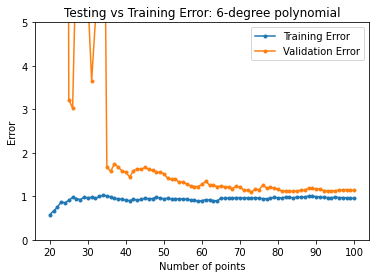

12-degree: training: 0.8966578686627228, test: 1.4445360955409086


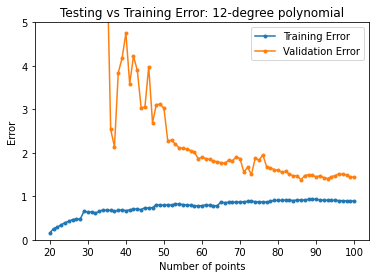

In [8]:
def computeAvgError(data, kf, num_folds, degree):
    # Iterate through cross-validation folds:
    all_train_err = []
    all_val_err = []

    # k-fold cross validation 
    for train_index, test_index in kf.split(data[:, 0]):
        # Training and testing data points for this fold:
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        coeffs = np.polyfit(x_train, y_train, degree)

        # calculate training error
        predicted_vals_train = np.polyval(coeffs, x_train)
        predicted_vals_test = np.polyval(coeffs, x_test)


        all_train_err.append(mean_squared_error(predicted_vals_train, y_train))
        all_val_err.append(mean_squared_error(predicted_vals_test, y_test))

    # print(f'Average Training error from the {num_folds} folds: {sum(all_train_err)/ num_folds}')
    # print(f'Average Test error from the {num_folds} folds: {sum(all_val_err)/ num_folds}')

    return sum(all_train_err)/ num_folds, sum(all_val_err)/ num_folds

def plotErrCurves(x, y_train, y_test, degree):
    # Plot the data:
    plt.figure()
    plt.plot(x, y_train, x, y_test, marker = '.')
    plt.legend(('Training Error', 'Validation Error'), loc = 'best')

    plt.xlabel('Number of points')
    plt.ylabel('Error')
    plt.ylim(0, 5) # how same frame of 
    plt.title(f'Testing vs Training Error: {degree}-degree polynomial')
    plt.margins(y=0.02)

    plt.show()

def kFoldError(data, num_folds, kf, degree):
    training_err = []
    test_err = []

    for data_size in range(20, 101):
        curr_data = data[:data_size]
        avg_train_err, avg_test_err = computeAvgError(curr_data, kf, num_folds, degree)
        training_err.append(avg_train_err)
        test_err.append(avg_test_err)

    print(f'{degree}-degree: training: {training_err[-1]}, test: {test_err[-1]}')
    x_vals = list(range(20, 101))
    
    # Draw the plots!
    plotErrCurves(x_vals, training_err, test_err, degree)

if __name__ == '__main__':
    all_data = load_data('data/bv_data.csv')

    # Initialize kfold cross-validation object with 5 folds:
    num_folds = 5
    kf = KFold(n_splits=num_folds)

    # Fit a degree-n polynomial to the data:
    for deg in [1, 2, 6, 12]:
        kFoldError(all_data, num_folds, kf, deg)   